# Exercise 4 Helper Code
by Bjørn Christian Weinbach

## LMS Algorithm

### Imports

In [1]:
from numpy.linalg import norm
from numpy import matmul, array, round, linspace
from pandas import DataFrame, Series
from itertools import cycle
import matplotlib.pyplot as plt

### Algorithm

In [2]:
def LMS(X, y, initial_theta, threshhold=1, learning_rate=0.5):
    # Table to return
    df = DataFrame(columns=('i', 'k', 'Theta', 'Condition', 'Theta*'))
    # Helper variables
    dim = len(X)
    # Iterator variables
    visited = 0
    i, itr = 0, 0
    k = i % dim
    # Initial theta
    thetai = initial_theta
    # Loop until a whole pass through X without updating theta
    while(visited < dim):
        visited += 1
        condition = norm((learning_rate/(i+1)) * (y[k] - matmul(thetai.T, X[k, :])) * X[k, :])
        theta_star = round((learning_rate/(i+1)) * (y[k] - matmul(thetai.T, X[k, :])) * X[k, :], 2)
        if condition > threshhold:
            yi, xi = y[k], X[k, :]
            df.loc[i] = Series({'i': i+1, 
                                'k': k+1, 
                                'Theta': thetai, 
                                'Condition': condition, 
                                'Theta*': theta_star})
            thetai = round(thetai + (learning_rate/(i+1)) * (yi - matmul(thetai.T, xi)) * xi, 2)
            visited = 0
            i += 1
        itr += 1
        k = itr % dim
    return df

### Construct data

In [3]:
X = array([[1, 2, 1],
           [2, 0, 1],
           [3, 1, 1],
           [2, 3, 1]])
        
y = array([1, 1, -1, -1])
theta = array([1, 1, 1])
df = LMS(X, y, theta)

### Initial run

In [4]:
df.head(10)

,i,k,Theta,Condition,Theta*
0,1,1,"[1, 1, 1]",3.674235,"[-1.5, -3.0, -1.5]"
1,2,2,"[-0.5, -2.0, -0.5]",1.397542,"[1.25, 0.0, 0.62]"
2,3,4,"[0.75, -2.0, 0.12]",2.107800,"[1.13, 1.69, 0.56]"
3,4,3,"[1.88, -0.31, 0.68]",2.906192,"[-2.63, -0.88, -0.88]"
4,5,4,"[-0.75, -1.19, -0.2]",1.597688,"[0.85, 1.28, 0.43]"


We see that this converges on 

$$
\Theta = (-0.75 \quad -1.19 \quad -0.2)
$$

And setting $g(x) = \Theta x = 0$ we get (using wolfram alpha)

$$

$$


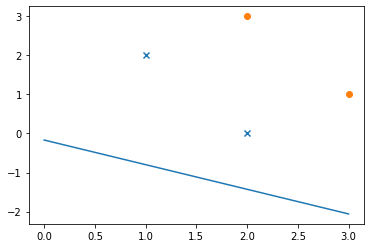

In [5]:
def f(x):
    return -0.630252*x - 0.168067

x = linspace(0, 3, 100)

plt.figure()
plt.scatter(X[0:2, 0], X[0:2, 1], marker='x')
plt.scatter(X[2:4, 0], X[2:4, 1], marker='o')
plt.plot(x, f(x))

This is a poor decision boundary. Lets increase the threshold and learning rate

In [14]:
df = LMS(X, y, theta, threshhold=0.5, learning_rate=2)

In [15]:
df

,i,k,Theta,Condition,Theta*
0,1,1,"[1, 1, 1]",14.696938,"[-6.0, -12.0, -6.0]"
1,2,2,"[-5.0, -11.0, -5.0]",35.777088,"[32.0, 0.0, 16.0]"
2,3,3,"[27.0, -11.0, 11.0]",181.308822,"[-164.0, -54.67, -54.67]"
3,4,4,"[-137.0, -65.67, -43.67]",961.007283,"[513.68, 770.52, 256.84]"
4,5,1,"[376.68, 704.85, 213.17]",1958.171090,"[-799.42, -1598.84, -799.42]"
...,...,...,...,...,...
1380,1381,1,"[154.35, 76.32, -447.97]",0.503662,"[0.21, 0.41, 0.21]"
1381,1382,4,"[154.56, 76.73, -447.76]",0.501144,"[-0.27, -0.4, -0.13]"
1382,1383,1,"[154.29, 76.33, -447.89]",0.502792,"[0.21, 0.41, 0.21]"
1383,1384,4,"[154.5, 76.74, -447.68]",0.500366,"[-0.27, -0.4, -0.13]"


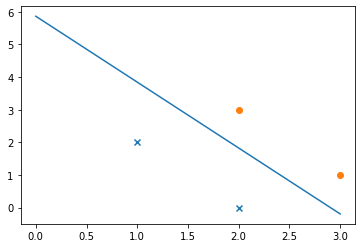

In [16]:
def f(x):
    return 5.86599 - 2.0203*x

x = linspace(0, 3, 100)

plt.figure()
plt.scatter(X[0:2, 0], X[0:2, 1], marker='x')
plt.scatter(X[2:4, 0], X[2:4, 1], marker='o')
plt.plot(x, f(x))

Which is a better decision boundary though computationally expensive.